<a href="https://colab.research.google.com/github/Chanduchennaveni/Customer_Churn_Prediction.ipynb/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customerID      10 non-null     object 
 1   gender          10 non-null     object 
 2   SeniorCitizen   10 non-null     int64  
 3   tenure          10 non-null     int64  
 4   MonthlyCharges  10 non-null     float64
 5   TotalCharges    10 non-null     float64
 6   Contract        10 non-null     object 
 7   PaymentMethod   10 non-null     object 
 8   Churn           10 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 852.0+ bytes


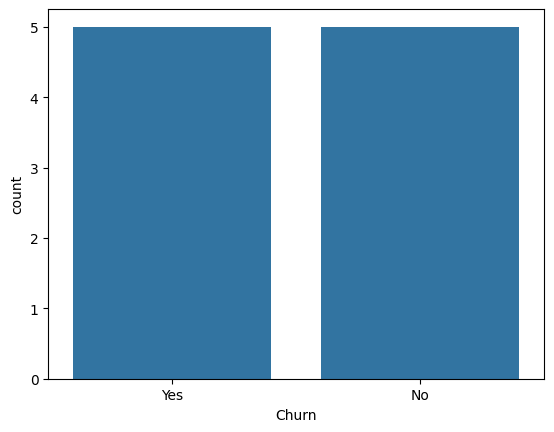

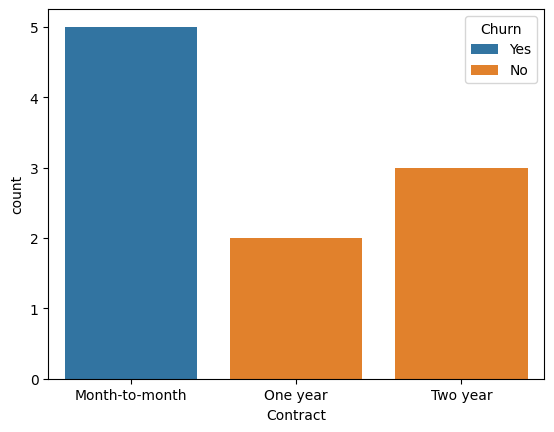

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


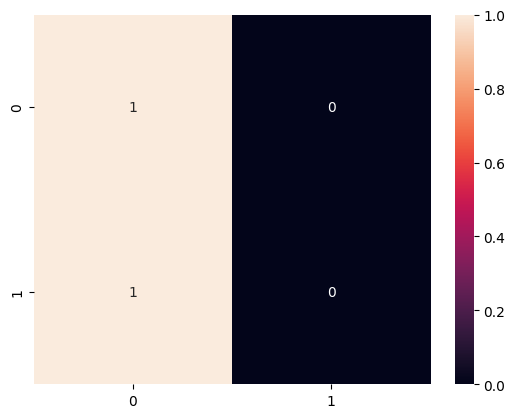

RF Accuracy: 1.0


,0
TotalCharges,0.203696
tenure,0.180800
SeniorCitizen,0.172091
PaymentMethod_Electronic check,0.164366
Contract_Two year,0.122025


In [14]:
import pandas as pd
df = pd.read_csv('/content/customer_churn.csv')
df.head()

df.info()
df.isnull().sum()

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.fillna(df.median(numeric_only=True), inplace=True)
df.drop('customerID', axis=1, inplace=True)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.show()

sns.countplot(x='Contract', hue='Churn', data=df)
plt.show()

df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df = pd.get_dummies(df, drop_first=True)

from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, rf_pred))

importance = pd.Series(rf.feature_importances_, index=X.columns)
importance.sort_values(ascending=False).head(5)

